In [1]:
import os, sys

In [2]:
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import  datasets
from torchvision.transforms import Compose, ToTensor, ConvertImageDtype
from torchvision.utils import  make_grid
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

d:\My_toolkits\Python\Python 3.9.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
sys.path.append('../../')
from models import CGanGenerator, CGanDiscriminator, CGanTrainer

In [4]:
IM_SHAPE = (1,28,28)
BATCH_SIZE = 32
Z_DIM = 100
EMBED_SIZE = 100
NUM_CLASSES = 10
CRITIC_INTERATIONS = 5

In [5]:
import importlib
importlib.reload(sys.modules['models'])

<module 'models' from 'd:\\Entertainment\\HCMUT\\IAS_lab\\research\\gans-collection\\notebooks\\cgan\\../..\\models\\__init__.py'>

In [6]:
custom_transforms = Compose([
    ToTensor(),
    ConvertImageDtype(torch.float32)
])

dataset = datasets.MNIST(
    root='../../data', download=True,
    transform=custom_transforms)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [9]:
generator = CGanGenerator(NUM_CLASSES, EMBED_SIZE, Z_DIM, IM_SHAPE).to(device)
discriminator =  CGanDiscriminator(NUM_CLASSES, EMBED_SIZE, IM_SHAPE).to(device)
CGanTrainer(2, generator, discriminator, loader, CRITIC_INTERATIONS, device)

Epoch 1/2
313/313 - lossD: 0.0000 - lossG: 11.5122 - 23s/epoch
Epoch 2/2
313/313 - lossD: 0.0000 - lossG: 15.0557 - 22s/epoch


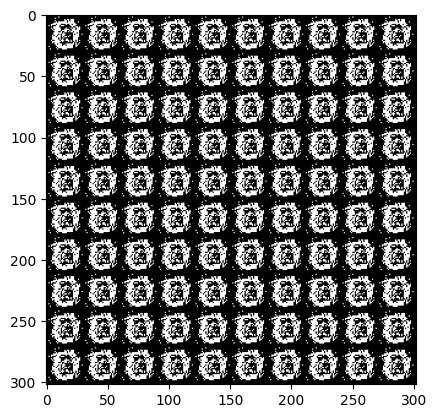

In [11]:
noises = torch.randn((100, Z_DIM)).to(device)
labels = torch.LongTensor([[i for i in range(10)] for j in range(10)]).view(-1).to(device)
out = generator(noises,labels)
grid = make_grid(out, nrow=10, normalize=True)
img = grid.detach().cpu().numpy().transpose((1,2,0))
plt.imshow(img,vmin=0, vmax=1, cmap='gray')